In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Library berhasil di-install dan di-import!
Jumlah data awal: 25
Jumlah data bersih: 25
✅ Hasil Encoding (Target menjadi 0/1):
   Prediksi_Status
0                1
1                1
2                1
3                1
4                0
------------------------------
✅ Hasil Normalisasi (Angka menjadi desimal 0-1):


,Total_Siswa,Total_Guru,Total_Kelas,Kelas_Rusak
0,0.313788,0.439490,0.696246,0.873874
1,0.446118,0.582803,0.808874,1.000000
2,0.917484,0.839172,1.000000,0.891892
3,1.000000,1.000000,0.945392,1.000000
4,0.362765,0.366242,0.460751,0.288288


Jumlah data bersih: 25

✅ Data berhasil disiapkan.
Data Latih: 20 baris
Data Uji  : 5 baris

--- SAMPEL DATA ---


,Lokasi,Total_Siswa,Total_Guru,Total_Kelas,Kelas_Rusak,Prediksi_Status
0,Kec. Bontonompo (Negeri),0.313788,0.439490,0.696246,0.873874,1
1,Kec. Bajeng (Negeri),0.446118,0.582803,0.808874,1.000000,1
2,Kec. Pallangga (Negeri),0.917484,0.839172,1.000000,0.891892,1
3,Kec. Somba Opu (Negeri),1.000000,1.000000,0.945392,1.000000,1
4,Kec. Bontomarannu (Negeri),0.362765,0.366242,0.460751,0.288288,0



⏳ Sedang melatih model Random Forest...
✅ Model BERHASIL dilatih!

--- HASIL EVALUASI MODEL ---
Akurasi Model: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



/tmp/ipython-input-4268193202.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=fitur, palette='viridis')


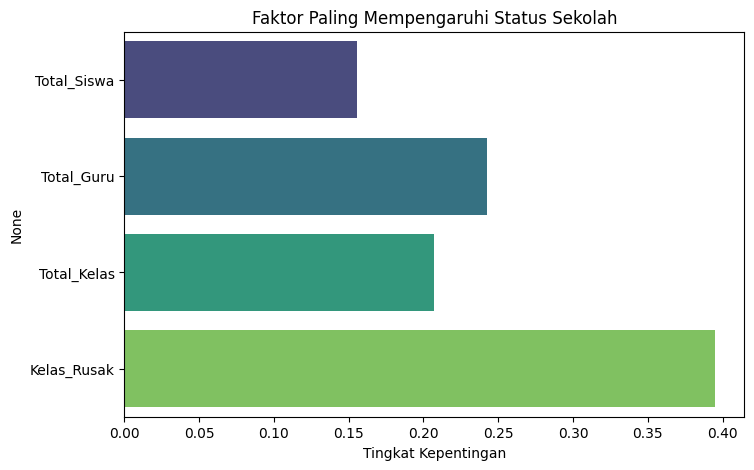

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a9c964c890788a6965.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e69b38a21f8e434062.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://e7336c4c36537bd9e3.gradio.live
Killing tunnel 127.0.0.1:7862 <> https://4b2f482c0486e8a615.gradio.live
Killing tunnel 127.0.0.1:7863 <> https://038ba3e0de7615fd05.gradio.live
Killing tunnel 127.0.0.1:7864 <> https://3b213d75cf09c96def.gradio.live
Killing tunnel 127.0.0.1:7865 <> https://38ebaa297ebe869a04.gradio.live
Killing tunnel 127.0.0.1:7866 <> https://e5f5ea218e3534306d.gradio.live
Killing tunnel 127.0.0.1:7867 <> https://024c76bcb3b97a2648.gradio.live
Killing tunnel 127.0.0.1:7868 <> https://a9c964c890788a6965.gradio.live


In [ ]:
# ============================================================
# BAB 1: PERSIAPAN LINGKUNGAN (INSTALL & IMPORT)
# ============================================================
# Install library Gradio untuk membuat tampilan web (jika belum ada)
!pip install gradio --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import gradio as gr
import os

print("✅ Library berhasil di-install dan di-import!")

# ============================================================
# BAB 2 & 3: DATA LOADING & PREPARATION
# ============================================================
filename = 'dataset_final_sekolah.csv'

# Cek apakah file ada
if not os.path.exists(filename):
    print(f"❌ ERROR: File '{filename}' tidak ditemukan di Colab.")
    print("👉 Silakan upload file CSV Anda ke folder di sebelah kiri dulu.")
else:
    # 1. Load Data
    df = pd.read_csv(filename)

    # 2. Cleaning (Hapus baris kosong/NaN jika ada)
    print(f"Jumlah data awal: {len(df)}")
    df = df.dropna()
    print(f"Jumlah data bersih: {len(df)}")

    # 1. Encoding (Target jadi Angka)
    le = LabelEncoder()
    df['Prediksi_Status'] = le.fit_transform(df['Prediksi_Status'])

    # --- TAMBAHAN AGAR MUNCUL DI LAYAR ---
    print("✅ Hasil Encoding (Target menjadi 0/1):")
    print(df[['Prediksi_Status']].head()) # Menampilkan 5 baris kolom target saja
    print("-" * 30)

    # 2. Normalisasi (Angka jadi 0-1)
    scaler = MinMaxScaler()
    kolom_angka = ['Total_Siswa', 'Total_Guru', 'Total_Kelas', 'Kelas_Rusak']
    df[kolom_angka] = scaler.fit_transform(df[kolom_angka])

    # --- TAMBAHAN AGAR MUNCUL DI LAYAR ---
    print("✅ Hasil Normalisasi (Angka menjadi desimal 0-1):")
    display(df[kolom_angka].head()) # Menampilkan tabel angka yang sudah berubah
    print(f"Jumlah data bersih: {len(df)}")


    # 3. Tentukan Fitur (X) dan Target (y)
    X = df[['Total_Siswa', 'Total_Guru', 'Total_Kelas', 'Kelas_Rusak']]
    y = df['Prediksi_Status']

    # 4. Bagi Data (80% Latih, 20% Uji)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n✅ Data berhasil disiapkan.")
    print(f"Data Latih: {len(X_train)} baris")
    print(f"Data Uji  : {len(X_test)} baris")

    # Tampilkan 5 data teratas untuk Laporan
    print("\n--- SAMPEL DATA ---")
    display(df.head())

    # ============================================================
    # BAB 4: MODELING (PELATIHAN AI)
    # ============================================================
    print("\n⏳ Sedang melatih model Random Forest...")

    # Inisialisasi Model
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Latih Model dengan Data Training
    model.fit(X_train, y_train)

    print("✅ Model BERHASIL dilatih!")

    # ============================================================
    # BAB 5: EVALUATION (PENGUJIAN)
    # ============================================================
    print("\n--- HASIL EVALUASI MODEL ---")

    # Prediksi Data Uji
    y_pred = model.predict(X_test)

    # 1. Skor Akurasi
    akurasi = accuracy_score(y_test, y_pred)
    print(f"Akurasi Model: {akurasi * 100:.2f}%")

    # 2. Laporan Detail
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 3. Grafik Feature Importance (Faktor apa yang paling penting?)
    importance = model.feature_importances_
    fitur = X.columns

    plt.figure(figsize=(8, 5))
    sns.barplot(x=importance, y=fitur, palette='viridis')
    plt.title('Faktor Paling Mempengaruhi Status Sekolah')
    plt.xlabel('Tingkat Kepentingan')
    plt.show()

    # ============================================================
    # BAB 6: DEPLOYMENT (APLIKASI WEB)
    # ============================================================

    # ============================================================
# BAB 6: DEPLOYMENT (SUDAH DIPERBAIKI INDENTASINYA)
# ============================================================
import gradio as gr
import pandas as pd

# Pastikan 'scaler' dan 'model' sudah ada (Jalankan Bab 1-5 dulu)

def prediksi_sekolah(total_siswa, total_guru, total_kelas, kelas_rusak):
    # PERHATIKAN: Semua baris di bawah ini menjorok ke dalam (Tab)
    try:
        # 1. Masukkan input user ke DataFrame
        data_input = pd.DataFrame([[total_siswa, total_guru, total_kelas, kelas_rusak]],
                                  columns=['Total_Siswa', 'Total_Guru', 'Total_Kelas', 'Kelas_Rusak'])

        # 2. LAKUKAN NORMALISASI
        data_input_scaled = scaler.transform(data_input)

        # 3. Prediksi dengan Model
        hasil_angka = model.predict(data_input_scaled)[0]

        # 4. Logika Saran
        if hasil_angka == 1:
            status = "⚠️ WASPADA (BERISIKO)"
            saran = "Sekolah ini membutuhkan intervensi segera (Renovasi/Penambahan Guru)."
        else:
            status = "✅ AMAN"
            saran = "Kualitas manajemen sekolah terjaga dengan baik."

        # Info Tambahan
        rasio = total_siswa / total_guru if total_guru > 0 else 0
        return f"Status: {status}\n\n📊 Analisis:\n- Rasio Guru: 1 berbanding {int(rasio)}\n\n💡 {saran}"

    except Exception as e:
        return f"Terjadi Error: {str(e)}\n(Pastikan Anda sudah menjalankan sel Bab 3 Transformasi Data)"

# Membuat Tampilan Web
interface = gr.Interface(
    fn=prediksi_sekolah,
    inputs=[
        gr.Number(label="Total Siswa", value=300),
        gr.Number(label="Total Guru", value=15),
        gr.Number(label="Total Ruang Kelas", value=13),
        gr.Number(label="Jumlah Kelas Rusak", value=6),
    ],
    outputs="text",
    title="Sistem Deteksi Dini Sekolah",
    description="Prediksi risiko penurunan mutu pendidikan berdasarkan data sekolah.",
)

interface.launch(share=True, debug=True)